<a href="https://colab.research.google.com/github/ealeongomez/Reinforcement-Learning/blob/main/Game-Connect_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle-environments

#**Libraries**

In [2]:
import numpy as np
import random
from kaggle_environments import make, evaluate

Loading environment football failed: No module named 'gfootball'


#**Create the game environment**

In [3]:
# Set debug=True to see the errors if your agent refuses to run
env = make("connectx", debug=True)

# List of available default agents
print(list(env.agents))

['random', 'negamax']


In [4]:
# Two random agents play one game round
env.run(["random", "random"])

# Show the game
env.render(mode="ipython")

#**Functions**

1. **obs**
    - obs.board: Tablero de juego 
      Una lista de Python con un elemento para cada ubicación de la cuadrícula
    
    - obs.mark: Pieza asignada al agente (ya sea 1 o 2)

    - obs.board: es una lista de Python que muestra las ubicaciones de los discos

\begin{array}{ccccccc}
   0 & 0 & 0 & 0 & 0 & 0 & 0 \\
   0 & 0 & 1 & 1 & 0 & 0 & 0 \\
   0 & 0 & 2 & 2 & 0 & 0 & 0 \\
   0 & 2 & 1 & 2 & 0 & 0 & 0 \\
   0 & 1 & 1 & 1 & 0 & 0 & 0 \\
   0 & 2 & 1 & 2 & 0 & 2 & 0 
\end{array}


 

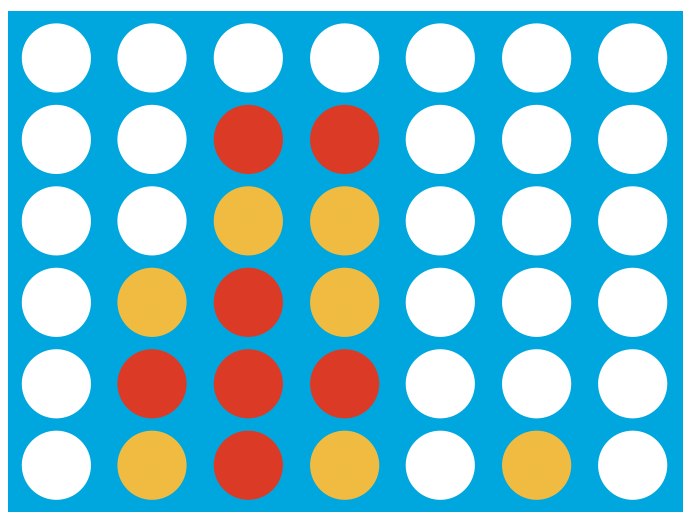

2. config
  
   - config.columns: columnas en el tablero de juego
   - config.rows: filas en el tablero de juego 
  - config.inarow: piezas que un jugador debe tener en una fila para ganar 

In [5]:
# Selecciona una columna válida aleatoria
def agent_random(obs, config):
    valid_moves = [col for col in range(config.columns) if obs.board[col] == 0]
    return random.choice(valid_moves)

# Selecciona la columna del medio
def agent_middle(obs, config):
    return config.columns//2

# Selecciona la columna válida más a la izquierda
def agent_leftmost(obs, config):
    valid_moves = [col for col in range(config.columns) if obs.board[col] == 0]
    return valid_moves[0]

In [6]:
# Agents play one game round
env.run([agent_leftmost, agent_random])

# Show the game
env.render(mode="ipython")

In [7]:
def get_win_percentages(agent1, agent2, n_rounds=100):
    config = {'rows': 6, 'columns': 7, 'inarow': 4}

    # Agent 1 goes first (roughly) half the time          
    outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2)
    # Agent 2 goes first (roughly) half the time      
    outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
    
    print("Agent 1 Win Percentage:", np.round(outcomes.count([1,-1])/len(outcomes), 2))
    print("Agent 2 Win Percentage:", np.round(outcomes.count([-1,1])/len(outcomes), 2))
    print("Number of Invalid Plays by Agent 1:", outcomes.count([None, 0]))
    print("Number of Invalid Plays by Agent 2:", outcomes.count([0, None]))

In [8]:
get_win_percentages(agent1=agent_middle, agent2=agent_random)

Agent 1 Win Percentage: 0.67
Agent 2 Win Percentage: 0.0
Number of Invalid Plays by Agent 1: 33
Number of Invalid Plays by Agent 2: 0


In [9]:
get_win_percentages(agent1=agent_leftmost, agent2=agent_random)

Agent 1 Win Percentage: 0.79
Agent 2 Win Percentage: 0.21
Number of Invalid Plays by Agent 1: 0
Number of Invalid Plays by Agent 2: 0
